In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

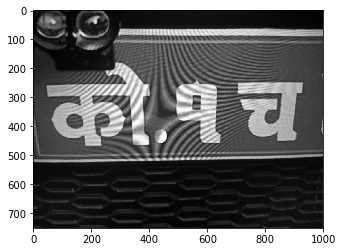

In [8]:
image = cv2.imread('../images/license4.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

resized_image = cv2.resize(image, (1000, 750))
plt.imshow(resized_image,cmap='gray')

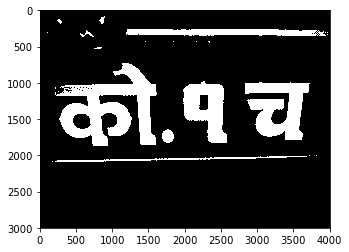

In [9]:
blurred = cv2.GaussianBlur(image,(5,5),0)
ret, thresh = cv2.threshold(blurred,160,255,cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

In [10]:
_, labels = cv2.connectedComponents(thresh)
mask = np.zeros(thresh.shape, dtype="uint8")

In [14]:
total_pixels = image.shape[0] * image.shape[1]
lower = total_pixels // 70
upper = total_pixels // 20

In [18]:
# Loop over the unique components
for (i, label) in enumerate(np.unique(labels)):
    # If this is the background label, ignore it
    if label == 0:
        continue
 
    # Otherwise, construct the label mask to display only connected component
    # for the current label
    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels == label] = 255
    numPixels = cv2.countNonZero(labelMask)
 
    # If the number of pixels in the component is between lower bound and upper bound, 
    # add it to our mask
    if numPixels > lower and numPixels < upper:
        mask = cv2.add(mask, labelMask)

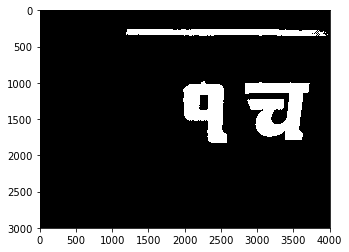

In [17]:
plt.imshow(mask,cmap='gray')